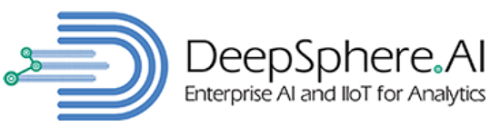

# ***Disclaimer***



DeepSphere.AI developed these materials based on its team’s expertise and technical infrastructure, and we are sharing these materials strictly for learning and research. These learning resources may not work on other learning infrastructures and DeepSphere.AI advises the learners to use these materials at their own risk. As needed, we will be changing these materials without any notification and we have full ownership and accountability to make any change to these materials.


#***Copyright Notice***


Local and international copyright laws protect this material. 
Repurposing or reproducing this material without written approval from DeepSphere.AI violates the law.
                    
                                        © DeepSphere.AI | Confidential and Proprietary


#***Lab 1: Summarize the given text using different summarization algorithms available.***

1. Summarization using nltk 

In [1]:
import re
import heapq
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
text = """Machine Learning is the field of study that gives computers the capability to learn without being explicitly programmed.
ML is one of the most exciting technologies that one would have ever come across. As it is evident from the name,
it gives the computer that makes it more similar to humans: The ability to learn.
Machine learning is actively being used today, perhaps in many more places than one would expect.
It can be any unprocessed fact, value, text, sound, or picture that is not being interpreted and analyzed.
Data is the most important part of all Data Analytics, Machine Learning, Artificial Intelligence.
Without data, we can’t train any model and all modern research and automation will go in vain.
Big Enterprises are spending lots of money just to gather as much certain data as possible.
The part of data that is used to do a frequent evaluation of the model, fit on the training dataset along with
improving involved hyperparameters (initially set parameters before the model begins learning).
This data plays its part when the model is actually training.
Once our model is completely trained, testing data provides an unbiased evaluation. When we feed in the inputs of Testing data,
our model will predict some values(without seeing actual output). After prediction, we evaluate our model by comparing it
with the actual output present in the testing data. This is how we evaluate and see how much our model has learned from
the experiences feed in as training data, set at the time of training."""

In [3]:
def summarize_text(article_text):
    # Removing Square Brackets and Extra Spaces
    vAR_article_text = re.sub("[()]","", article_text) ##Changes here 
    vAR_article_text = re.sub(r'\[[0-9]*\]', ' ', vAR_article_text)
    vAR_article_text = re.sub(r'\s+', ' ', vAR_article_text)
    # Removing special characters and digits
    vAR_formatted_article_text = re.sub('[^a-zA-Z]', ' ', vAR_article_text )
    vAR_formatted_article_text = re.sub(r'\s+', ' ', vAR_formatted_article_text)
    # Converting Text To Sentences
    vAR_sentence_list = nltk.sent_tokenize(vAR_article_text) ##vAR_article text instead of article text
    vAR_stopwords = nltk.corpus.stopwords.words('english')
    # Find Weighted Frequency of Occurrence
    vAR_word_frequencies = {}
    for word in nltk.word_tokenize(vAR_formatted_article_text):
        if word not in vAR_stopwords:
            if word not in vAR_word_frequencies.keys():
                vAR_word_frequencies[word] = 1
            else:
                vAR_word_frequencies[word] += 1
    if len(vAR_word_frequencies) >0:
        maximum_frequncy = max(vAR_word_frequencies.values())
    else:
        maximum_frequncy = 1

    for word in vAR_word_frequencies.keys():
        vAR_word_frequencies[word] = (vAR_word_frequencies[word]/maximum_frequncy)
    # Calculating Sentence Scores
    vAR_sentence_scores = {}
    for sent in vAR_sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in vAR_word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in vAR_sentence_scores.keys():
                        vAR_sentence_scores[sent] = vAR_word_frequencies[word]
                    else:
                        vAR_sentence_scores[sent] += vAR_word_frequencies[word]
    vAR_summary_sentences = heapq.nlargest(5, vAR_sentence_scores, key=vAR_sentence_scores.get)
    vAR_summary = ' '.join(vAR_summary_sentences)
    return vAR_summary


In [4]:
sentences = summarize_text(text)

In [5]:
print(sentences)

This is how we evaluate and see how much our model has learned from the experiences feed in as training data, set at the time of training. When we feed in the inputs of Testing data, our model will predict some valueswithout seeing actual output. After prediction, we evaluate our model by comparing it with the actual output present in the testing data. This data plays its part when the model is actually training. Once our model is completely trained, testing data provides an unbiased evaluation.


2. Summarization using BERT

In [6]:
!pip3 install bert-extractive-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 101 kB 13.7 MB/s 
     |████████████████████████████████| 596 kB 69.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
!pip3 install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=bf74468d1a3ae7959bab9e15bdcfbff4f12b88963737a2bbe1a9ba1a6d49a36c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [8]:
from summarizer import Summarizer 
obj_Textsumm=Summarizer()

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [9]:
vAR_summary=obj_Textsumm(text)
print(vAR_summary)

Machine Learning is the field of study that gives computers the capability to learn without being explicitly programmed. Big Enterprises are spending lots of money just to gather as much certain data as possible. The part of data that is used to do a frequent evaluation of the model, fit on the training dataset along with
improving involved hyperparameters (initially set parameters before the model begins learning).


#***Lab 2: Build a text classifier with TextBlob and train a text classifier using Simple transformers.***

In [10]:
!pip3 install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

In [14]:
vAR_filepath = r'/content/drive/MyDrive/Introduction_to_Natural_Language_Processing/Unit9/IMDB_Dataset.csv'
# Read Input data
vAR_df=pd.read_csv(vAR_filepath)

In [15]:
vAR_df.shape

(50000, 2)

In [16]:
vAR_df = vAR_df[:1050]

In [17]:
vAR_df.shape

(1050, 2)

In [18]:
vAR_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
vAR_df['sentiment'].value_counts()

positive    529
negative    521
Name: sentiment, dtype: int64

In [20]:
vAR_df['Labels']=vAR_df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)


In [21]:
vAR_df

,review,sentiment,Labels
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
1045,"Not the best plot in the world, but the comedy...",positive,1
1046,What a surprise; two outstanding performances ...,positive,1
1047,Felt it was very balanced in showing what Jeho...,positive,1
1048,A proof that it's not necessary for a movie to...,positive,1


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(vAR_df['review'],vAR_df['Labels'], test_size=0.1)


In [24]:
y_test.shape

(105,)

In [31]:
Text_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
Encoder_Transformers = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [32]:
l1 = tf.keras.layers.Input(shape=(), dtype=tf.string, name='pre-processing')
l2 = Text_preprocess(l1)
l3 = Encoder_Transformers(l2)

In [33]:
l4 = tf.keras.layers.Dropout(0.2, name="Regularizer")(l3['pooled_output'])
l4 = tf.keras.layers.Dense(1, activation='sigmoid', name="Classification_output_layer")(l4)

In [34]:
obj_model = tf.keras.Model(inputs=[l1], outputs = [l4])


In [35]:
obj_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pre-processing (InputLayer)    [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['pre-processing[0][0]']         
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [36]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      
]

obj_model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [37]:
obj_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
30/30 [==============================] - 20s 356ms/step - loss: 0.7715 - accuracy: 0.4783
Epoch 2/10
30/30 [==============================] - 11s 363ms/step - loss: 0.7185 - accuracy: 0.5058
Epoch 3/10
30/30 [==============================] - 11s 362ms/step - loss: 0.7033 - accuracy: 0.5164
Epoch 4/10
30/30 [==============================] - 11s 350ms/step - loss: 0.6766 - accuracy: 0.5587
Epoch 5/10
30/30 [==============================] - 10s 336ms/step - loss: 0.6785 - accuracy: 0.5947
Epoch 6/10
30/30 [==============================] - 10s 334ms/step - loss: 0.6640 - accuracy: 0.5968
Epoch 7/10
30/30 [==============================] - 10s 338ms/step - loss: 0.6639 - accuracy: 0.5926
Epoch 8/10
30/30 [==============================] - 10s 342ms/step - loss: 0.6399 - accuracy: 0.6307
Epoch 9/10
30/30 [==============================] - 10s 343ms/step - loss: 0.6389 - accuracy: 0.6307
Epoch 10/10
30/30 [==============================] - 10s 346ms/step - loss: 0.6429 - accura

In [38]:
y_predicted = obj_model.predict(X_test)
y_predicted = y_predicted.flatten()

4/4 [==============================] - 2s 334ms/step


In [39]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [40]:
yp = obj_model.predict(["Movie is superb. Had fun"])


1/1 [==============================] - 1s 705ms/step


In [41]:
yp = yp.flatten()

In [42]:
yp

array([0.73803425], dtype=float32)

In [43]:
yp = np.where(yp > 0.5, 1, 0)
yp

array([1])

In [44]:
from textblob.classifiers import NaiveBayesClassifier


In [45]:
vAR_filepath = r'/content/drive/MyDrive/Introduction_to_Natural_Language_Processing/Unit9/IMDB_Dataset.csv'
# Read Input data
vAR_df=pd.read_csv(vAR_filepath)

In [46]:
vAR_df_NB = vAR_df[:1000]


In [47]:
vAR_df_NB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import numpy as np
vAR_df_NB = np.array(vAR_df_NB)
obj_cls = NaiveBayesClassifier(vAR_df_NB)


In [50]:
vAR_pred_array = []
for i in vAR_df[1000:1050]['review']:
  vAR_pred = obj_cls.classify(i)
  vAR_pred_array.append(vAR_pred)

In [51]:
vAR_pred_array

['negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative']